In [19]:
import trackpy
import pims
import matplotlib.pyplot as plt
import pandas as pd
import os
## Beta Please
## Himi Microscope
## I have assumed that you are smart person who can change the /Variables appropriately
## Since i was getting a lot of corrupted tag error when using a tiff file which made me want to throw away my laptop
## i opened fiji and converted the video into png sequences.
## But hey, world is your oyster, I'm just living in it.



In [42]:
dir = '/home/himanshu/Keema/HS'
## My frames of video are saved using followign names "C9 HSc i" where i is the ith frame
## to extract all the frame i just use the *, which means dont care what's here, so it will 
## look for files with C9 HSc in the beginning and .png in the end
i=2
fname = os.path.join(dir,f'C9 HS{i}-*.png')
frame = pims.open(fname)
len(frame)
## Exactly

2000

In [43]:
df = trackpy.locate(frame[0], diameter = (3,7), separation = 22)

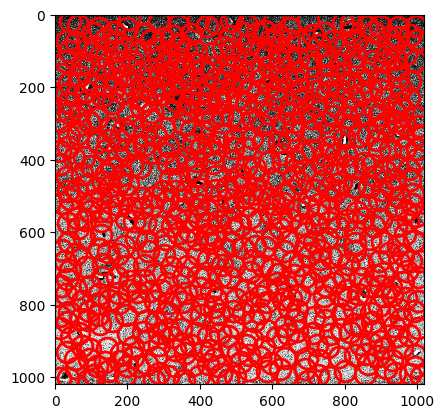

<Axes: >

In [44]:
df.head()
trackpy.annotate(df, frame[0])
## baap re


### Beta check the histogram for mass size and tweak the mass threshold appropiately

(array([ 37., 359., 301.,  37.,  10.,   7.,   3.,   0.,   2.,   1.]),
 array([10819.13397067, 16839.2593524 , 22859.38473413, 28879.51011586,
        34899.63549759, 40919.76087932, 46939.88626105, 52960.01164278,
        58980.13702451, 65000.26240625, 71020.38778798]),
 <BarContainer object of 10 artists>)

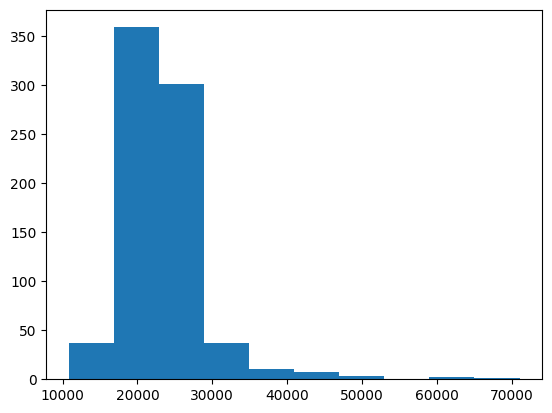

In [45]:
plt.hist(df['mass'])

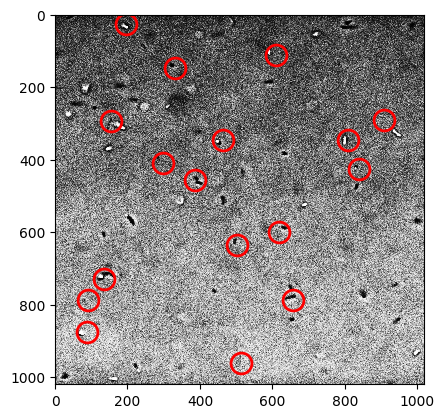

In [46]:
minmass =40000
## I set the minimum separation to 22 because if i lowered it
## my pc would cry
df = trackpy.locate(frame[70], diameter = (3,7), separation = 22, minmass = minmass)
df.head()
trackpy.annotate(df, frame[0]);

In [ ]:
dfs = trackpy.batch(frame[:2000], diameter = (5,7), separation = 22, minmass = minmass)

Frame 803: 562 features


In [ ]:
dfs = dfs.dropna()

In [ ]:
## Features now get converted to trajectories OwO

trajs = trackpy.link(dfs, 7, memory=3)

In [ ]:
## filter out spurious trajectories with less than 25 points
print('Before:', trajs['particle'].nunique())

trajs= trackpy.filter_stubs(trajs, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('After:', trajs['particle'].nunique())

## From here I am just shamelessly copying digital sreeni's tutorial

In [ ]:
## computing drift 
d = trackpy.compute_drift(trajs)
d.plot()
## Remove drift

trajs_drift_removed = trackpy.subtract_drift(trajs.copy(), d) 


In [ ]:
## There seems to be index level and column label ambiguity if I don;t run the following.
trajs_drift_removed= trajs_drift_removed.rename(columns={'particle':'Particle'})

fps = 1/0.02 #sec # to be set later
micron_per_pixel = 0.1135000# check in fiji
msd = trackpy.imsd(trajs_drift_removed, mpp = micron_per_pixel, fps = fps, max_lagtime= 30 )
plt.plot(msd.index, msd, alpha = 0.1);
plt.xscale('log')
plt.yscale('log')

In [ ]:
msd.head()

In [ ]:
## Saving into csv, but hey if you prefer .oogbooga format for storing the trajectories
## you can but i won't help
##This is the time averged msd per particle, iam stupid, my bad guys :( 
## but i ain't getting paid for this
msd.to_csv(f'C9-HS-{i}.csv')


In [ ]:
trajs_drift_removed.head()

In [ ]:
trajs_drift_removed = trajs_drift_removed.rename(columns = {'Particle':'particle'})
ensemble_msd = trackpy.emsd(trajs_drift_removed,mpp= micron_per_pixel, fps= fps)
ensemble_msd.to_csv(f'C9-HSemsd-{i}.csv')
    

In [ ]:
trajs_drift_removed

In [ ]:
ense